In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("house prediction/HousingData.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
mean_imp = SimpleImputer(strategy='mean')
cols = ["CRIM", "ZN", "INDUS", "AGE", "LSTAT"]

for col in cols:
    df[col] = mean_imp.fit_transform(df[[col]]).ravel()

In [15]:
chas_imp = SimpleImputer(strategy = "most_frequent")
df["CHAS"] = chas_imp.fit_transform(df[["CHAS"]]).ravel()

In [17]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [43]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


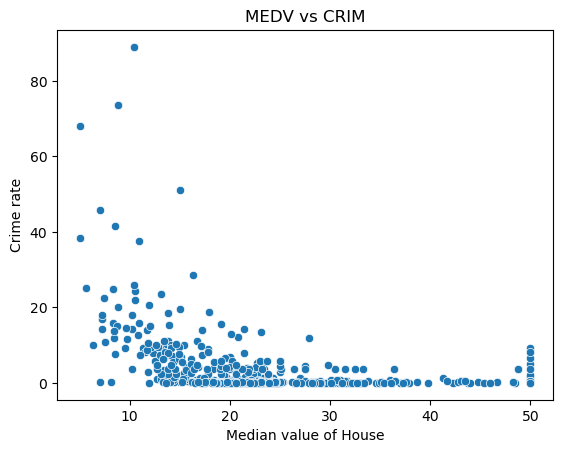

In [21]:
sns.scatterplot(
    df,
    x = "MEDV",
    y = "CRIM"
)
plt.xlabel("Median value of House")
plt.ylabel("Crime rate")
plt.title("MEDV vs CRIM")
plt.show()

In [37]:
chas_count = df["CHAS"].value_counts().sort_index()
chas_count

CHAS
0.0    472
1.0     34
Name: count, dtype: int64

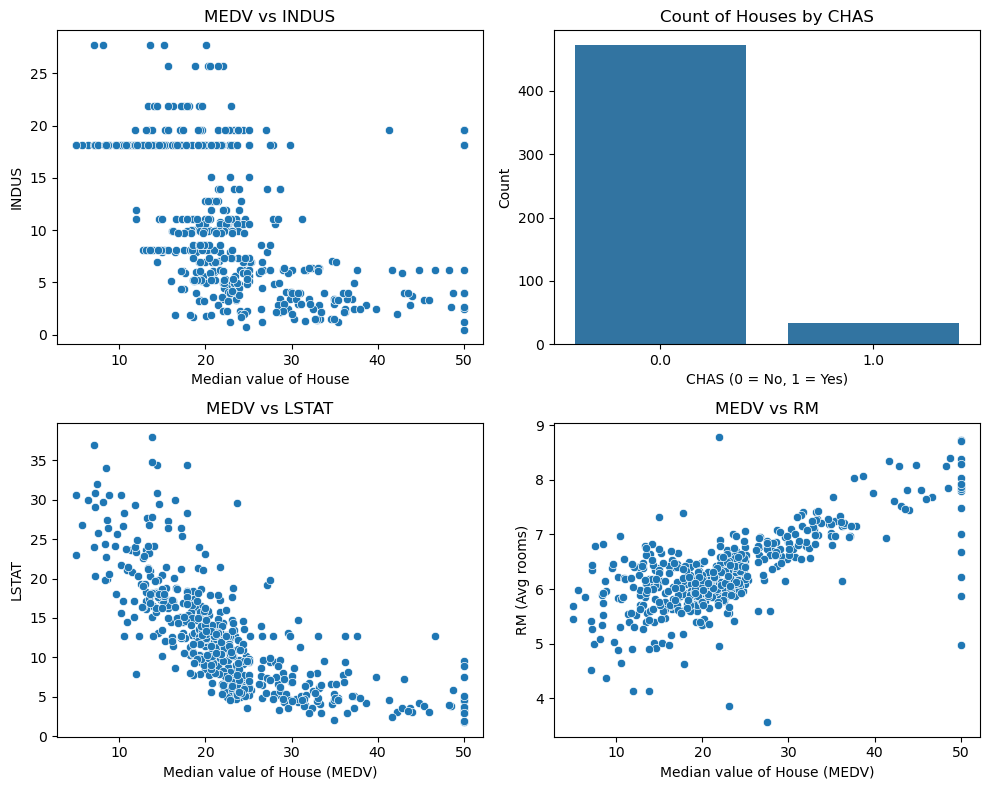

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.scatterplot(
    df,
    x = "MEDV",
    y = "INDUS",
    ax = axes[0, 0]
)
axes[0, 0].set_xlabel("Median value of House")
axes[0, 0].set_ylabel("INDUS")
axes[0, 0].set_title("MEDV vs INDUS")

sns.barplot(
    x = chas_count.index,
    y = chas_count.values,
    ax = axes[0, 1]
)
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xlabel("CHAS (0 = No, 1 = Yes)")
axes[0, 1].set_title("Count of Houses by CHAS")

sns.scatterplot(
    data=df,
    x="MEDV",
    y="LSTAT",
    ax=axes[1, 0]
)
axes[1, 0].set_title("MEDV vs LSTAT")
axes[1, 0].set_xlabel("Median value of House (MEDV)")
axes[1, 0].set_ylabel("LSTAT")

sns.scatterplot(
    data=df,
    x="MEDV",
    y="RM",
    ax=axes[1, 1]
)
axes[1, 1].set_title("MEDV vs RM")
axes[1, 1].set_xlabel("Median value of House (MEDV)")
axes[1, 1].set_ylabel("RM (Avg rooms)")

plt.tight_layout()
plt.show()

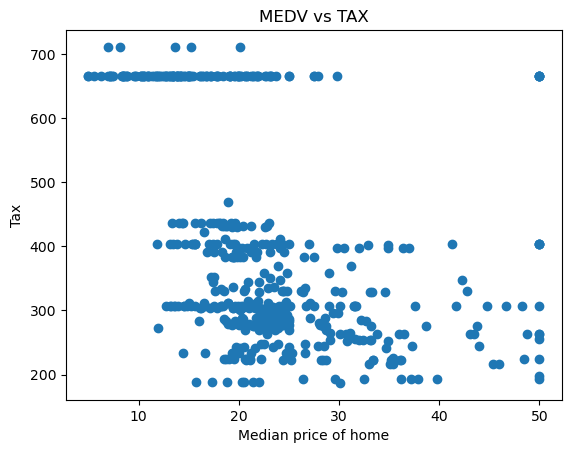

In [45]:
plt.scatter(
    x = df["MEDV"],
    y = df["TAX"]
)
plt.xlabel("Median price of home")
plt.ylabel("Tax")
plt.title("MEDV vs TAX")
plt.show()

In [47]:
Q1 = df["MEDV"].quantile(0.25)
Q3 = df["MEDV"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower: ",lower)
print("Upper: ", upper)

Lower:  5.0624999999999964
Upper:  36.962500000000006


In [51]:
outlier = (df["MEDV"] > 36.96).value_counts()
outlier

MEDV
False    468
True      38
Name: count, dtype: int64

In [55]:
df = df[(df["MEDV"] >= lower) & (df["MEDV"] <= upper)]

In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.586269,10.367628,11.325128,0.057940,0.556826,6.179633,68.731362,3.833586,9.669528,413.105150,18.617382,354.197790,13.303965,20.719099
std,8.183586,21.722403,6.619018,0.233881,0.117400,0.576325,27.336403,2.124901,8.792361,168.544572,2.063273,94.679607,6.814424,6.451416
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.085120,0.000000,5.860000,0.000000,0.453000,5.876250,46.400000,2.104425,4.000000,284.000000,17.400000,374.590000,7.927500,16.500000
50%,0.274475,0.000000,9.955000,0.000000,0.538000,6.163500,74.650000,3.272100,5.000000,335.000000,19.100000,391.955000,12.670000,20.600000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.506250,93.750000,5.241300,24.000000,666.000000,20.200000,396.397500,17.107500,24.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,36.500000


In [59]:
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [66]:
#Using LinearRegressor model with help of pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr_model", LinearRegression())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Mean squared error:  10.465304013291115
Mean absolute error:  2.290577966667596


In [64]:
#Using DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

y_pred = dtr_model.predict(X_test)

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Mean squared error:  13.629787234042556
Mean absolute error:  2.7808510638297874


In [65]:
#Using RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Mean squared error:  6.31486273404256
Mean absolute error:  1.8959042553191505


In [ ]:
# RandomForestRegressor is the best-performing model since it achieved the lowest MAE and MSE compared to the other models.